In [1]:
import pandas as pd
from plotting_csv import *
import matplotlib.colors as mcolors
from scipy.interpolate import make_interp_spline

       λ    μ       p      n  snr        MSE  null_risk       γ
0    1.0  1.0    20.0  200.0  1.0   1.093641   2.136987   0.100
1    1.0  1.0    21.0  200.0  1.0   1.093610   2.124974   0.105
2    1.0  1.0    23.0  200.0  1.0   1.113956   2.105275   0.115
3    1.0  1.0    25.0  200.0  1.0   1.229790   2.111775   0.125
4    1.0  1.0    27.0  200.0  1.0   1.234097   2.128947   0.135
..   ...  ...     ...    ...  ...        ...        ...     ...
235  1.0  1.0  1455.0  200.0  5.0  21.268571  24.857281   7.275
236  1.0  1.0  1576.0  200.0  5.0  20.343451  23.974784   7.880
237  1.0  1.0  1706.0  200.0  5.0  20.624233  24.074471   8.530
238  1.0  1.0  1847.0  200.0  5.0  20.506710  23.189325   9.235
239  1.0  1.0  2000.0  200.0  5.0  21.248419  23.227043  10.000

[240 rows x 8 columns]


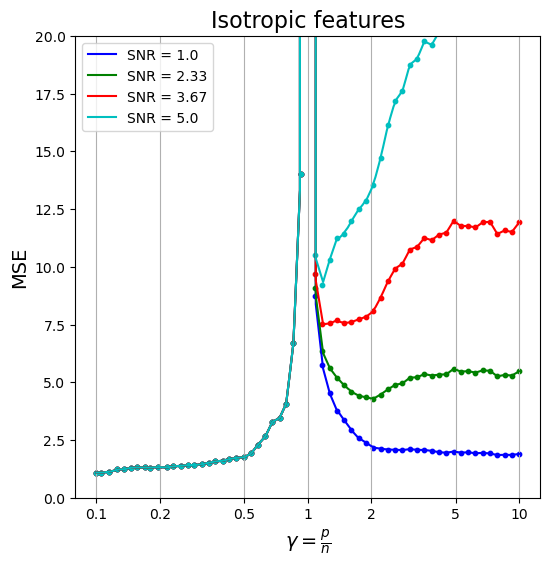

In [4]:
# Create the corrected plot with rotated and selectively displayed x-tick labels
file_name = '../results/Python/results_[13-09-2023_23:02:29-2355].csv'
df = pd.read_csv(file_name)
df.columns = ['λ','μ', "p", 'n', 'snr', 'MSE', 'null_risk']
df['γ'] = df['p'] / df['n']
print(df)
def symlog_transform(x):
    return np.log10(x) if x >= 1 else -np.log10(1/x)

fig, ax = plt.subplots(figsize=(6, 6))

for i, snr in enumerate(df['snr'].unique()):
    conditions = df['snr'] == snr
    x = df[conditions]
    y = df[conditions]
    plt.scatter(list(map(symlog_transform, x['γ'])), y['MSE'], s=10, color = list(mcolors.BASE_COLORS.keys())[i])

    x_gamma_s = x[x['γ'] <= 1]
    x_gamma_l = x[x['γ'] >= 1]
    y_gamma_s = y[y['γ'] <= 1]
    y_gamma_l = y[y['γ'] >= 1]
    
    x_ls = [x_gamma_s['γ'], x_gamma_l['γ']]
    y_ls = [y_gamma_s['MSE'], y_gamma_l['MSE']]
    
    
    for idx, xy in enumerate(zip(x_ls, y_ls)):
        x, y = xy
        spline_mse = make_interp_spline(x, y, k=1)
        if idx == 0:
            x_s = np.linspace(x.min(), 1, 100)
            y_s = spline_mse(x_s)
            plt.plot(list(map(symlog_transform, x_s)), y_s, color = list(mcolors.BASE_COLORS.keys())[i], label=f'SNR = {round(snr, 2)}')
        if idx == 1:
            x_s = np.linspace(1, x.max(), 100)
            y_s = spline_mse(x_s)
            plt.plot(list(map(symlog_transform, x_s)), y_s, color = list(mcolors.BASE_COLORS.keys())[i])

# Selective x-ticks to avoid overlap
selected_labels = [0.1, 0.2, 0.5, 1, 2, 5, 10]
selected_ticks = list(map(symlog_transform, [0.1, 0.2, 0.5, 1, 2, 5, 10]))

plt.xticks(selected_ticks, selected_labels)

# Labels and title
plt.xlabel('$\\gamma = \\frac{p}{n}$', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('Isotropic features', fontsize=16)
ax.xaxis.grid(True)
plt.grid(True, which="minor", ls="--", c='gray')
ax.set_ylim(0, 20)
plt.legend()
plt.show()